
# Importing packages and reading dataset


In [342]:
import pandas as pd
import math
# Load the dataset
data = pd.read_csv('/content/^NSEI.csv')  # Replace 'path_to_your_dataset.csv' with the actual file path

# Creating new columns for predictions

In [343]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Calculate Log Returns
data['Log Returns'] = data['Close'].pct_change().apply(lambda x: math.log(1 + x))  # Calculate log returns from 'Close'

# Calculate Moneyness
data['Moneyness'] = data['Close'] / data['Adj Close']  # Calculate moneyness using 'Close' and 'Adj Close'

# Assuming 'Date' column contains the contract's expiration date and today's date is used for the calculation
data['Time to Maturity'] =  data['Date'] + pd.DateOffset(days=30)  # Calculate time to maturity

# Assuming risk-free interest rate is constant, or you have another source
data['Risk-Free Interest Rate'] = 0.05  # Set a constant interest rate

lets have a look how the dataset actually looks

In [344]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Log Returns,Moneyness,Time to Maturity,Risk-Free Interest Rate
0,2014-01-02,6301.250000,6358.299805,6211.299805,6221.149902,6221.149902,158100.0,NaN,1.0,2014-02-01,0.05
1,2014-01-03,6194.549805,6221.700195,6171.250000,6211.149902,6211.149902,139000.0,-0.001609,1.0,2014-02-02,0.05
2,2014-01-06,6220.850098,6224.700195,6170.250000,6191.450195,6191.450195,118300.0,-0.003177,1.0,2014-02-05,0.05
3,2014-01-07,6203.899902,6221.500000,6144.750000,6162.250000,6162.250000,138600.0,-0.004727,1.0,2014-02-06,0.05
4,2014-01-08,6178.049805,6192.100098,6160.350098,6174.600098,6174.600098,146900.0,0.002002,1.0,2014-02-07,0.05


In [345]:
data.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume,Log Returns,Moneyness,Time to Maturity,Risk-Free Interest Rate
0,2014-01-02,6301.250000,6358.299805,6211.299805,6221.149902,6221.149902,158100.0,NaN,1.0,2014-02-01,0.05
1,2014-01-03,6194.549805,6221.700195,6171.250000,6211.149902,6211.149902,139000.0,-0.001609,1.0,2014-02-02,0.05
2,2014-01-06,6220.850098,6224.700195,6170.250000,6191.450195,6191.450195,118300.0,-0.003177,1.0,2014-02-05,0.05
3,2014-01-07,6203.899902,6221.500000,6144.750000,6162.250000,6162.250000,138600.0,-0.004727,1.0,2014-02-06,0.05
4,2014-01-08,6178.049805,6192.100098,6160.350098,6174.600098,6174.600098,146900.0,0.002002,1.0,2014-02-07,0.05
5,2014-01-09,6181.700195,6188.049805,6148.250000,6168.350098,6168.350098,150100.0,-0.001013,1.0,2014-02-08,0.05
6,2014-01-10,6178.850098,6239.100098,6139.600098,6171.450195,6171.450195,159900.0,0.000502,1.0,2014-02-09,0.05
7,2014-01-13,6189.549805,6288.200195,6189.549805,6272.750000,6272.750000,135000.0,0.016281,1.0,2014-02-12,0.05
8,2014-01-14,6260.250000,6280.350098,6234.149902,6241.850098,6241.850098,110200.0,-0.004938,1.0,2014-02-13,0.05
9,2014-01-15,6265.950195,6325.200195,6265.299805,6320.899902,6320.899902,145900.0,0.012585,1.0,2014-02-14,0.05


To check number of rows and columns:

In [346]:
print(data.shape)

(1230, 11)


Let's gather more information :

In [347]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     1230 non-null   datetime64[ns]
 1   Open                     1220 non-null   float64       
 2   High                     1220 non-null   float64       
 3   Low                      1220 non-null   float64       
 4   Close                    1220 non-null   float64       
 5   Adj Close                1220 non-null   float64       
 6   Volume                   1220 non-null   float64       
 7   Log Returns              1229 non-null   float64       
 8   Moneyness                1220 non-null   float64       
 9   Time to Maturity         1230 non-null   datetime64[ns]
 10  Risk-Free Interest Rate  1230 non-null   float64       
dtypes: datetime64[ns](2), float64(9)
memory usage: 105.8 KB
None


# Handling NULL Values & Exploratory Data Analysis

In [348]:
null_count = data.isnull().sum()

In [349]:
print("Number of null values in each column:\n", null_count)

Number of null values in each column:
 Date                        0
Open                       10
High                       10
Low                        10
Close                      10
Adj Close                  10
Volume                     10
Log Returns                 1
Moneyness                  10
Time to Maturity            0
Risk-Free Interest Rate     0
dtype: int64


In [350]:
# Remove rows with null values in any column
data.dropna(inplace=True)

# Modeling

## XGBoost

Applying XGBoost

In [351]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Load the dataset
data = pd.read_csv('/content/^NSEI.csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Calculate Log Returns
data['Log Returns'] = data['Close'].pct_change().apply(lambda x: np.log(1 + x))  # Calculate log returns from 'Close'

# Calculate Moneyness
data['Moneyness'] = data['Close'] / data['Adj Close']  # Calculate moneyness using 'Close' and 'Adj Close'

# Assuming 'Date' column contains the contract's expiration date and today's date is used for the calculation
data['Time to Maturity'] = (data['Date'] - pd.to_datetime('today')).dt.days  # Calculate time to maturity in days

# Assuming risk-free interest rate is constant, or you have another source
data['Risk-Free Interest Rate'] = 0.05  # Set a constant interest rate

# Assuming 'Close' as the target column
target_column = 'Close'

# Drop rows with missing values in the target column
data.dropna(subset=[target_column], inplace=True)

# Encode categorical columns using LabelEncoder
categorical_cols = ['Date']  # Add other categorical columns if needed
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Define features (excluding the target column)
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Log Returns', 'Moneyness', 'Time to Maturity', 'Risk-Free Interest Rate']

# Splitting the data into train and test sets
X = data[features]
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb = XGBRegressor()

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions
predictions = xgb.predict(X_test)

# Error metrics & Data Visualisation:
Mean Absolute Error:

In [352]:
# Evaluate the model (you can use regression evaluation metrics)
# For example, mean absolute error (MAE)
mae = np.mean(np.abs(predictions - y_test))
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 14.227417004866817


Root Mean Square Error:

In [353]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the target column
target = 'Close'

# Select features and target
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Log Returns', 'Moneyness', 'Time to Maturity', 'Risk-Free Interest Rate']
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb = XGBRegressor()

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Hyperparameter tuning (example, you might want to refine these)
params = {
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators': [100, 200, 300]
}

# Initialize the XGBoost regressor for hyperparameter tuning
xgb_tune = XGBRegressor()

# Perform GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=xgb_tune, param_grid=params, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Fit the model with the best parameters
best_xgb = XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_tuned = best_xgb.predict(X_test)

# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = mse_tuned ** 0.5
print(f"Tuned Model RMSE: {rmse_tuned}")


Root Mean Squared Error (RMSE): 22.583838366232058
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.7}
Tuned Model RMSE: 16.033834928660898


## Scatter plot

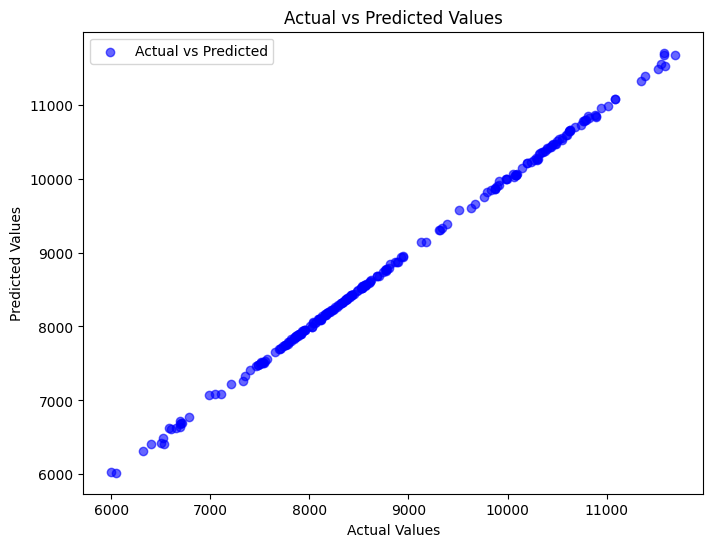

In [354]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


R2 Score:

In [355]:
from sklearn.metrics import r2_score

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


R-squared (R2) Score: 0.999698469299721


Cross Validation Score:

In [356]:
from sklearn.model_selection import cross_val_score

# Initialize XGBoost model
xgb = XGBRegressor()

# Perform K-fold cross-validation
cv_scores = cross_val_score(xgb, X, y, cv=5)  # Change cv value as needed
print("Cross Validation Scores:", cv_scores)
print("Mean Cross Validation Score:", np.mean(cv_scores))


Cross Validation Scores: [ 0.74725589  0.99843148  0.99594051  0.62247023 -0.40191009]
Mean Cross Validation Score: 0.5924376040514125


## Error distribution:

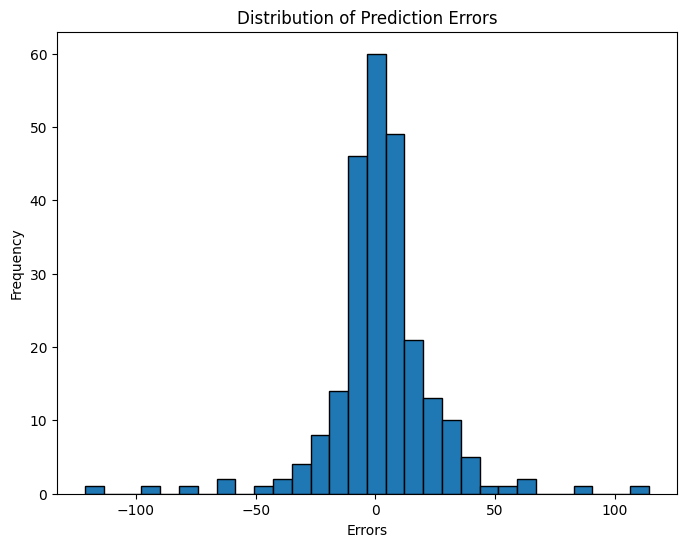

In [357]:
# Calculate errors
errors = y_test - y_pred

# Plotting the error distribution
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()


The shape of the histogram provides insights into the distribution of errors. A symmetric distribution around zero implies that the model's errors are evenly distributed above and below the actual values. If the histogram is skewed towards either end (positive or negative), it indicates a bias in the predictions.

## Residual plot

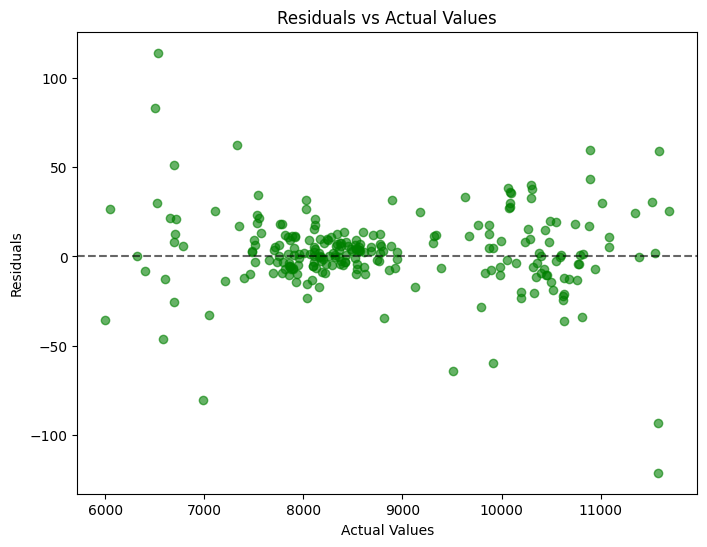

In [358]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test - y_pred, color='green', marker='o', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Values')
plt.show()


This plot helps visualize the relationship between the actual values and their corresponding residuals. The horizontal line at y=0 indicates where residuals equal zero, allowing you to see how much the predictions deviate from the actual values across the dataset.







# Predicting range of prices by classifying "Close" price

In [365]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Load the dataset
data = pd.read_csv('/content/^NSEI.csv')

# Assuming 'Close' as the target column
target_column = 'Close'

# Calculate the range and intervals for creating classes
min_value = data[target_column].min()
max_value = data[target_column].max()
interval = (max_value - min_value) / 5

# Function to map the 'Close' values to classes
def classify_close(value):
    if value <= min_value + interval:
        return 0
    elif value <= min_value + 2 * interval:
        return 1
    elif value <= min_value + 3 * interval:
        return 2
    elif value <= min_value + 4 * interval:
        return 3
    else:
        return 4

# Create a new column 'Close_Class' representing the classes
data['Close_Class'] = data[target_column].apply(classify_close)

# Define features (X) and target variable (y)
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
X = data[features]
y = data['Close_Class']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Fit the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
predictions = xgb_classifier.predict(X_test)


In [360]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/^NSEI.csv')  # Load your dataset here

# Set the bins for classifying 'Close' values
num_classes = 5
bin_edges = pd.cut(data['Close'], bins=num_classes, labels=False)
data['Close_Class'] = bin_edges

# Check the distribution of classes
class_distribution = data['Close_Class'].value_counts()
print(class_distribution)


1.0    394
2.0    331
3.0    244
4.0    154
0.0     97
Name: Close_Class, dtype: int64


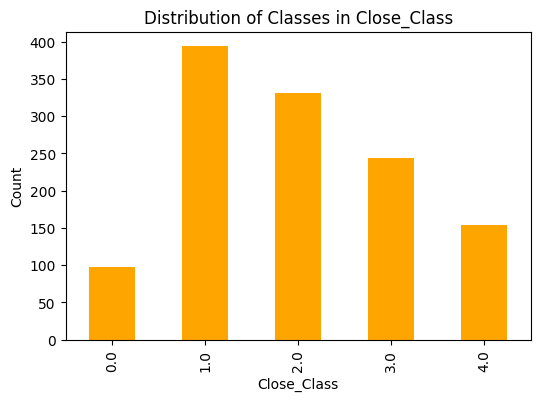

In [361]:
# Plotting the distribution of classes in Close_Class
plt.figure(figsize=(6, 4))
data['Close_Class'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.xlabel('Close_Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Close_Class')
plt.show()

The above graph says that frequency of closing price lies more  CLASS-1.

In [366]:
# Define features (X) and target variable (y)
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']  # Update features based on available columns

X = data[features]
y = data['Close_Class']  # 'Close_Class' contains the classes for the 'Close' column

In [367]:
class_ranges = data.groupby('Close_Class')['Close'].describe()
print(class_ranges)

             count          mean         std           min           25%  \
Close_Class                                                                
0             97.0   6497.495877  331.934519   6000.899902   6191.450195   
1            394.0   7866.962181  279.858355   7162.950195   7671.562378   
2            331.0   8681.216325  281.781613   8296.299805   8464.824707   
3            244.0  10139.928079  312.889060   9445.400391   9907.074952   
4            154.0  10959.558124  315.826947  10593.150391  10715.762451   

                      50%           75%           max  
Close_Class                                            
0             6511.899902   6736.100098   7123.149902  
1             7889.274902   8111.350098   8295.450195  
2             8629.150391   8808.650391   9438.250000  
3            10185.724609  10412.462891  10589.099609  
4            10847.875000  11133.724854  11738.500000  


Let's look at range of price:

In [368]:
import pandas as pd

# Sample DataFrame
data = {
    'Class': [0.0, 1.0, 2.0, 3.0, 4.0],
    'Count': [97, 394, 331, 244, 154],
    'Mean': [6497.495877, 7866.962181, 8681.216325, 10139.928079, 10959.558124],
    'Std': [331.934519, 279.858355, 281.781613, 312.889060, 315.826947],
    'Min': [6000.899902, 7162.950195, 8296.299805, 9445.400391, 10593.150391],
    'Max': [7123.149902, 8295.450195, 9438.25, 10589.099609, 11738.5]
}

df = pd.DataFrame(data)

# Select only the necessary columns
result = df[['Class', 'Min', 'Max']]
print(result)


   Class           Min           Max
0    0.0   6000.899902   7123.149902
1    1.0   7162.950195   8295.450195
2    2.0   8296.299805   9438.250000
3    3.0   9445.400391  10589.099609
4    4.0  10593.150391  11738.500000


In [369]:
print(pd.unique(y_train))

[2 4 3 1 0]


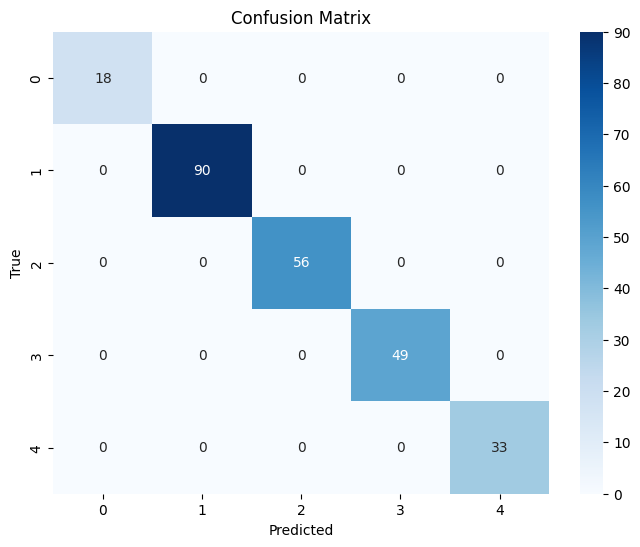

In [370]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Get the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Above plot says that Close prices lying in Class-1 are more accurately predicted by our Model.

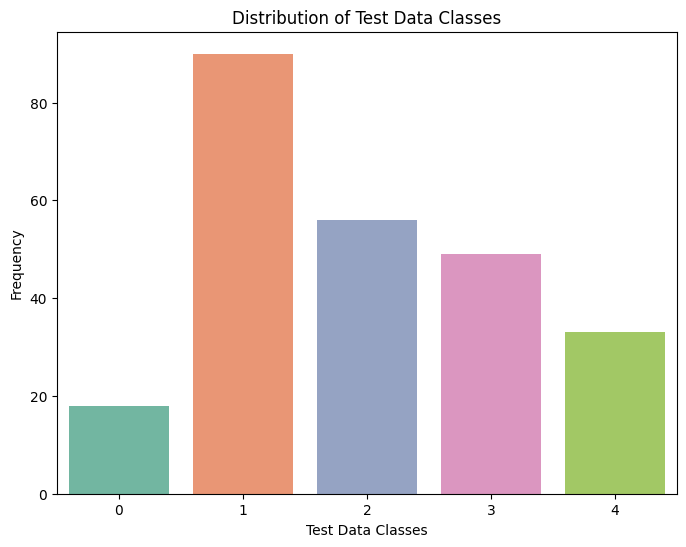

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of classes in the test data
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, palette='Set2')  # Assuming y_test contains the true class labels
plt.xlabel('Test Data Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Test Data Classes')
plt.show()
